<a href="https://colab.research.google.com/github/rania-azad/DL-Project1-10-07-2024/blob/main/Handwritten_Digit_Recognition_Hands_on1_Final%20Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritten Digit Recognition (PART1) 🚀

In this notebook, we're embarking on an exciting journey to develop a basic understanding of building and training a neural network for recognizing handwritten digits using PyTorch. We'll dive into the world of the MNIST dataset 📊, a classic in the machine learning community, renowned for its collection of black and white images of digits from 0 to 9.

This lab is designed to empower you with key skills and concepts in deep learning:

    🧠 Understand Gradient Descent from Scratch
    📚 Load Dataset using PyTorch
    🏗️ Build a Neural Network using PyTorch
    🚀 Start the training script and watch your neural network learn!

Let's get started and unlock the potential of neural networks in digit recognition! 💡🔍




## PART1: Gradient Descent
GD is an algorithm that help us find the minimum of the error function. It is an important algorithm used in all deep learning projects.

In this first part, we are going to develop GD from scratch to learn how it works. We are going to go through GD using our example in the course (pass/fail).

In [ ]:
import matplotlib.pyplot as plt # visualization
import numpy as np # numerical operation / fast tensors and arrays
import pandas as pd # tabular manipulation

In [ ]:
# DO NOT TOUCH (These are helper function)
# Some helper functions for plotting and drawing lines
def plot_points(X, y):
    passed = X[np.argwhere(y==1)]
    failed = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in failed], [s[0][1] for s in failed], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in passed], [s[0][1] for s in passed], s = 25, color = 'red', edgecolor = 'k')


def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

In [ ]:
# DO NOT CHANGE
# Generating random dataset.
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(0)

mean_pass = [0.5, 0.8]
cov_pass = [[0.01, 0], [0, 0.02]]  # Diagonal covariance

mean_fail = [0.3, 0.3]
cov_fail = [[0.01, 0], [0, 0.02]]

# Generate 'pass' and 'fail' data
pass_students = np.random.multivariate_normal(mean_pass, cov_pass, 50)
fail_students = np.random.multivariate_normal(mean_fail, cov_fail, 50)

# Create dataframes for pass and fail students
df_pass = pd.DataFrame(pass_students, columns=['Hours', 'Attendance'])
df_pass['Label'] = 1

df_fail = pd.DataFrame(fail_students, columns=['Hours', 'Attendance'])
df_fail['Label'] = 0

# Combine the two dataframes into one
df = pd.concat([df_pass, df_fail], ignore_index=True)

df.head()

,Hours,Attendance,Label
0,0.540016,1.049475,1
1,0.724089,0.938414,1
2,0.402272,1.064113,1
3,0.484864,0.934363,1
4,0.541060,0.785403,1


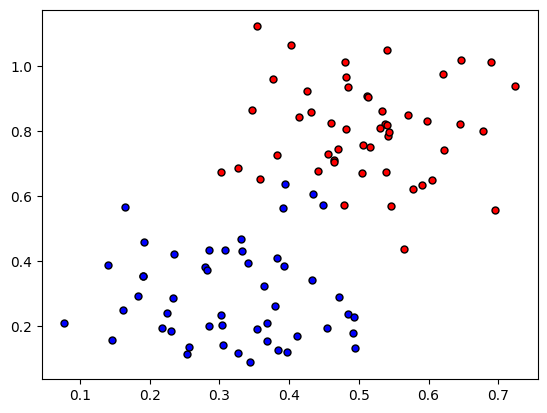

In [ ]:
X = np.array(df[["Hours","Attendance"]])
y = np.array(df['Label'])
plot_points(X,y)
plt.show()

## TODO: Implementing the basic functions
Here is your turn to shine. Implement the following formulas, as explained in the text.
- Sigmoid activation function

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

- Output (prediction) formula

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

- Error function

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

- The function that updates the weights

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$

In [ ]:
# TODO: Implement the following functions
# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Output (prediction) formula
# features * weights
def output_formula(features, weights, bias):
    return sigmoid(np.dot(features, weights)+bias)

# Error (log-loss) formula (cross entropy)
# Ground truth: Pass (1) / Output: 0.8
# Ground truth: Fail (0) / Output: 0.9
def error_formula(y, output):
    return -y*np.log(output)-(1-y)*np.log(1-output)


# Gradient descent step
def update_weights(x, y, weights, bias, learnrate):
    output = output_formula(x, weights, bias)
    error = error_formula(y, output)
    weights += learnrate * (y - output) * x
    bias += learnrate * (y-output)
    return weights, bias

### Training Function (using GD)

In [ ]:
# TODO: Complete this code
np.random.seed(44) # it is for reproducibility, it helps define the random distribution
epochs = 1000
learnrate = 0.1

def train(features, targets, epochs, learnrate, graph_lines=False):
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0

    # CHANGE HERE
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            output = output_formula(x, weights, bias)
            error = error_formula(y, output)
            weights, bias = update_weights(x, y, weights, bias, learnrate)

        # STOP CHANGING
        # Printing out the log-loss (cross entropy) error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])


    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()

###🏋️‍♂️ Training Time: Watch the Algorithm Learn!

By initiating the training function, we're going to witness our model's learning process in real-time! Here's what to expect as the magic unfolds:

* **Progress Updates:** Get ready for a series of 10 informative updates, complete with the current training loss and accuracy metrics. Watch as the numbers evolve, showcasing the algorithm's improvement with each epoch.

* **Visual Insights:** A dynamic plot will bring our data to life, along with the progression of boundary lines that our model generates. Keep an eye on the black line – that's our model's final hypothesis. Observe how each iteration nudges the boundaries closer to the ideal fit. It's like watching the algorithm's thought process visualized!

* **Error Trends:** Another plot will graph the journey of our error function. Anticipate a satisfying downward trend as the epochs roll by, indicating that our model is minimizing mistakes and maximizing precision.

So, let's hit 'Run' and watch the algorithm flex its computational muscles towards achieving peak performance! 🚀


========== Epoch 0 ==========
Train loss:  0.7605390974235715
Accuracy:  0.5

========== Epoch 100 ==========
Train loss:  0.1103065453802336
Accuracy:  0.96

========== Epoch 200 ==========
Train loss:  0.09192849699239616
Accuracy:  0.96

========== Epoch 300 ==========
Train loss:  0.08490540399070849
Accuracy:  0.96

========== Epoch 400 ==========
Train loss:  0.08113972445822988
Accuracy:  0.96

========== Epoch 500 ==========
Train loss:  0.07878554882131955
Accuracy:  0.96

========== Epoch 600 ==========
Train loss:  0.07717653574502109
Accuracy:  0.96

========== Epoch 700 ==========
Train loss:  0.07601023885642726
Accuracy:  0.96

========== Epoch 800 ==========
Train loss:  0.07512864962311223
Accuracy:  0.96

========== Epoch 900 ==========
Train loss:  0.07444091815522497
Accuracy:  0.96


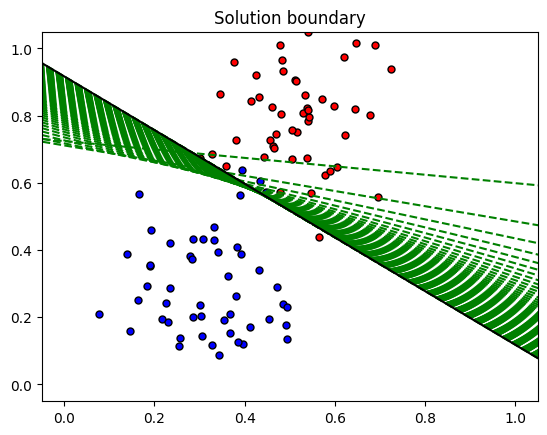

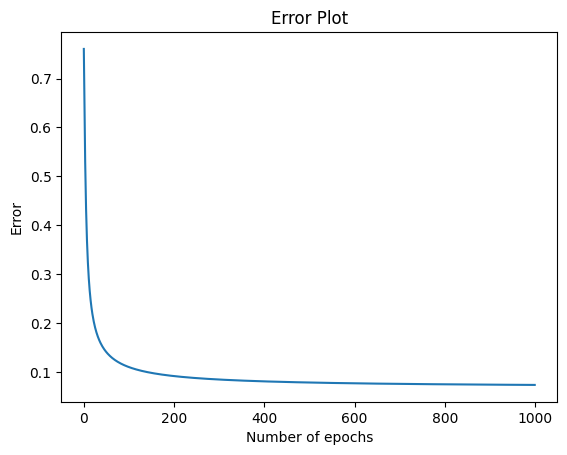

In [ ]:
train(X, y, epochs, learnrate, True)

In [ ]:
# TODO: experiment with different learning rates !


## PART2: PyTorch 🛠️

PyTorch is an open-source deep learning library, widely used for applications such as computer vision and natural language processing. It is known for its flexibility and ease of use, especially when it comes to building and experimenting with neural network architectures. Developed by the Facebook AI Research lab, PyTorch provides two high-level features: Tensor computation (like NumPy) with strong GPU acceleration, and Deep Neural Networks built on a tape-based autograd system. It's particularly favored for its dynamic computational graph and efficient memory usage, which makes it a go-to tool for researchers and developers alike.

### Loading the MNIST Dataset
The MNIST dataset is a collection of 70,000 grayscale images of handwritten digits. We will load this dataset and prepare it for training our neural network. It is a "Hello, World!" of computer vision, providing a manageable dataset to train basic image processing and pattern recognition algorithms.

Let's dive into the data loading process!



In [ ]:
a = np.array([1, 2, 3])
print(type(a))

<class 'numpy.ndarray'>


In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Transformations applied on each image
# Transform is used to chain multiple transformation together, here we have:
# convert image to pytorch type, and normalize the images to speed the process,
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Loading MNIST dataset from torchvision
train_set = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)

# TODO: Load the test set (Use the same thing as train_set)
test_set = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_set, batch_size=64, shuffle=True)

## Displaying Images and Their Labels
Let's visualize some of the images in our dataset along with their corresponding labels.


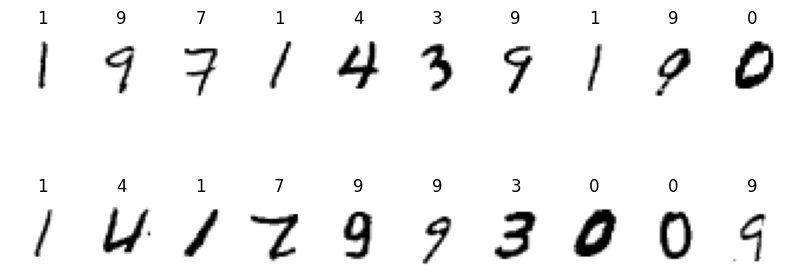

Batch 1


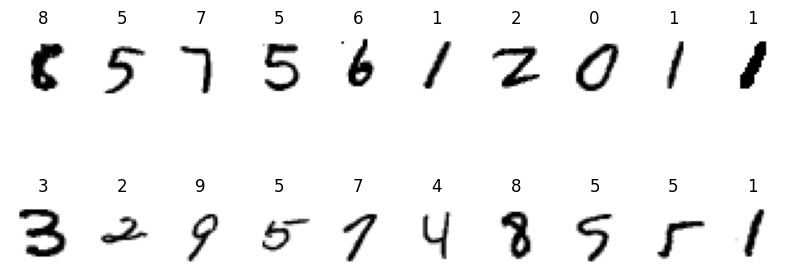

Batch 2


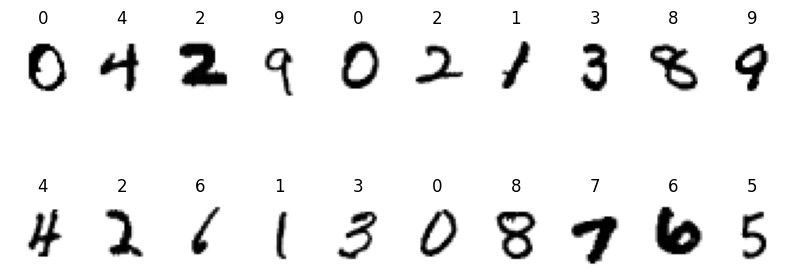

Batch 3


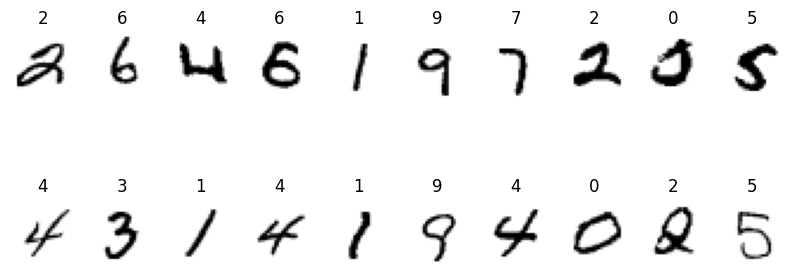

Batch 4


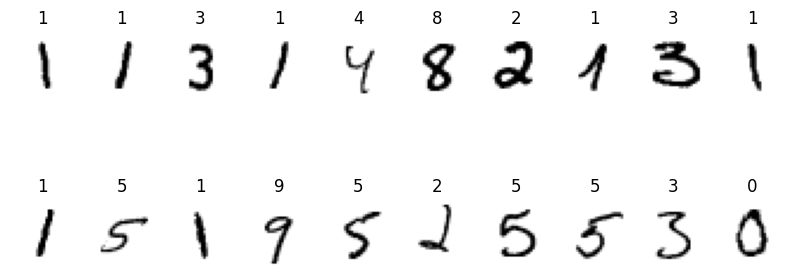

Batch 5


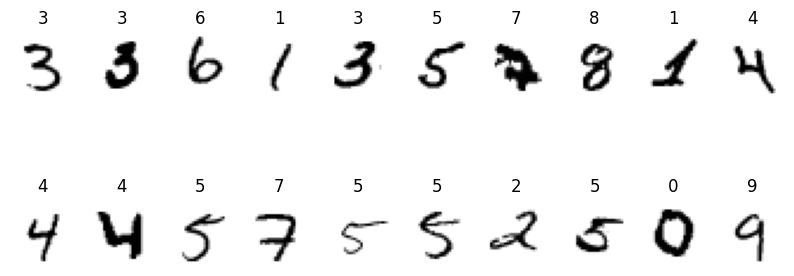

In [ ]:
import matplotlib.pyplot as plt

# Function to display images
def show_images(images, labels):
    plt.figure(figsize=(10, 4))
    for i in range(20):
        plt.subplot(2, 10, i+1)
        plt.imshow(images[i].numpy().squeeze(), cmap='gray_r')
        plt.title(labels[i].item())
        plt.axis('off')
    plt.show()

# Get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
# Display images
show_images(images, labels)


# TODO: Explore different batches and display their images and labels
# Explore different batches and display their images and labels
for batch_idx, (images, labels) in enumerate(train_loader):
    if batch_idx >= 3:  # Display only the first 3 batches
        break
    print(f"Batch {batch_idx + 1}")
    show_images(images, labels)

## Building a Fully Connected Neural Network
We will now define our neural network architecture. We'll start with a simple fully connected network with a single hidden layer.

When using an image in a fully connected neural network, we need to change its dimension.
![](https://miro.medium.com/v2/resize:fit:1400/1*IWUxuBpqn2VuV-7Ubr01ng.png)

In [ ]:
# TODO: Complete this code
# Fill the size of the input and output to the layer
import torch.nn as nn
import torch.nn.functional as F

# Neural network with a single fully connected layer
class SimpleNet(nn.Module):
    # executed when model is created
    def __init__(self):
        super(SimpleNet, self).__init__()
        #This corresponds to the flattened size of MNIST images, which are 8x28 pixels.
        self.fc1 = nn.Linear(28*28,10)  # TODO: Define the fully connected layer

    # executed when model is called to get output
    def forward(self, x):
        # flattens the input tensor x into a 1D tensor, where -1 indicates that the batch size is inferred automatically.
        x = x.view(-1, 28*28)  # Flatten the image
        # Applies the fully connected layer to the flattened input tensor x.
        x = self.fc1(x) # w1x1 + w2x2+w3x3.... + w784x784 + b
        # Computes the logarithm of the softmax function along dimension 1
        return F.log_softmax(x, dim=1) # turn output to probabilities

# Create an instance of the network, then displaying the layers and their configurations
model = SimpleNet()
print(model)

SimpleNet(
  (fc1): Linear(in_features=784, out_features=10, bias=True)
)


## Training the Model
Next, we'll define the training loop. We will train our model using gradient descent.


In [ ]:
# TODO: Complete this code
import torch.optim as optim

# Loss function and optimizer
# nn.CrossEntropyLoss() is a standard choice for classification problems in PyTorch. It combines nn.LogSoftmax() and nn.NLLLoss() in one single class
criterion = nn.CrossEntropyLoss()
# initializes stochastic gradient descent (SGD) optimizer. model.parameters() provides the parameters (weights and biases) of the SimpleNet model to be optimized. lr=0.01 sets the learning rate for the optimizer, controlling the step size during gradient descent.
optimizer = optim.SGD(model.parameters(), lr=0.01)  # SGD optimizer with learning rate 0.01

# Training loop
#  iterates over the dataset 10 times (epochs).
for epoch in range(10):
   # accumulates the total loss for each epoch
   running_loss = 0.0
    for images, labels in train_loader:
        # Clear gradients, gradient in multi-dimentions, erase the gradient in the next iteration
        optimizer.zero_grad()

        # Forward pass
        # computes the forward pass through the model (SimpleNet), producing the predicted outputs.
        outputs = model(images)

        # Compute loss
        # alculates the loss between predicted outputs (outputs) and actual labels (labels) using the defined criterion (CrossEntropyLoss).
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        # computes gradients of the loss with respect to all model parameters. Calculate derive
        loss.backward()
        # updates the model parameters based on the computed gradients. calculate GD
        optimizer.step()
        # adds the current batch loss (loss.item()) to running_loss.
        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss {running_loss/len(train_loader)} ")

# Print model's state_dict
print("Model's state_dict:")
# returns a Python dictionary mapping each layer to its parameter tensor (weights and biases).
# to print each parameter's name (param_tensor) and its size (model.state_dict()[param_tensor].size()).
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

Epoch 1, Loss 0.609005124441215 
Epoch 2, Loss 0.38649124026234977 
Epoch 3, Loss 0.3523218474630862 
Epoch 4, Loss 0.3351821853582666 
Epoch 5, Loss 0.3238741068491168 
Epoch 6, Loss 0.31553697424815663 
Epoch 7, Loss 0.30984937736411083 
Epoch 8, Loss 0.3047347502397703 
Epoch 9, Loss 0.3010997127241163 
Epoch 10, Loss 0.2975716262833396 
Model's state_dict:
fc1.weight 	 torch.Size([10, 784])
fc1.bias 	 torch.Size([10])


## Model Evaluation
Finally, let's evaluate the performance of our model on the test dataset.


In [ ]:
# Evaluation on the test dataset
model.eval()  # Set model to evaluation mode
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy on test set: {100 * correct / total:.2f}%")

Accuracy on test set: 91.82%


In [ ]:
# TODO: Write the evaluation loop
# Evaluation on the test dataset
import torch
model.eval()  # Set model to evaluation mode
test_loss = 0
correct = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        test_loss += criterion(outputs, labels).item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()

    test_loss /= len(test_loader.dataset)
    accuracy = 100.0 * correct / len(test_loader.dataset)

print(f"\nTest set: Average loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}%")

# Print model's state_dict
print("\nModel's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())


Test set: Average loss: 0.0045, Accuracy: 91.82%

Model's state_dict:
fc1.weight 	 torch.Size([10, 784])
fc1.bias 	 torch.Size([10])


# Conclusion
In this notebook, we covered the basics of loading a dataset, visualizing it, building a simple neural network, and training it. We encourage you to experiment with different network architectures, learning rates, and other hyperparameters.

## Additional Resources
- [PyTorch Official Documentation](https://pytorch.org/docs/stable/index.html)
- [Deep Learning with PyTorch: A 60 Minute Blitz](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
- [Neural Networks and Deep Learning by Michael Nielsen](http://neuralnetworksanddeeplearning
